<a href="https://colab.research.google.com/github/GabrielaP05/ProyectoAnalisisyprocesamiento/blob/main/ProyectoAnalisisyprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017.0,Bangalore,3.0,34.0,Male,No,0.0,Not Leave
1,Bachelors,2013.0,Pune,1.0,28.0,Female,No,3.0,Leave
2,Bachelors,2014.0,New Delhi,3.0,38.0,Female,No,2.0,Not Leave
3,Masters,2016.0,Bangalore,3.0,27.0,Male,No,5.0,Leave
4,Masters,2017.0,Pune,3.0,24.0,Male,Yes,2.0,Leave


Education                     0
JoiningYear                  36
City                          0
PaymentTier                  42
Age                          27
Gender                        0
EverBenched                   0
ExperienceInCurrentDomain    30
LeaveOrNot                    0
dtype: int64


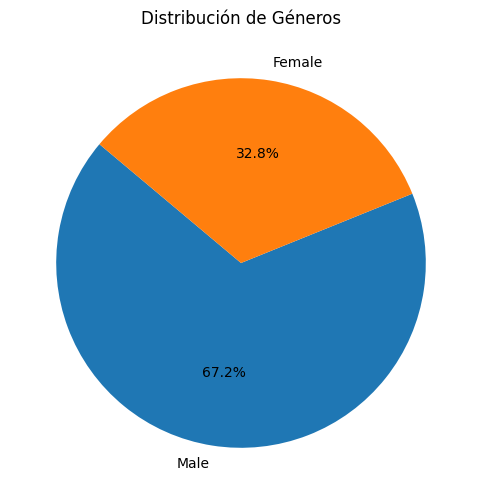

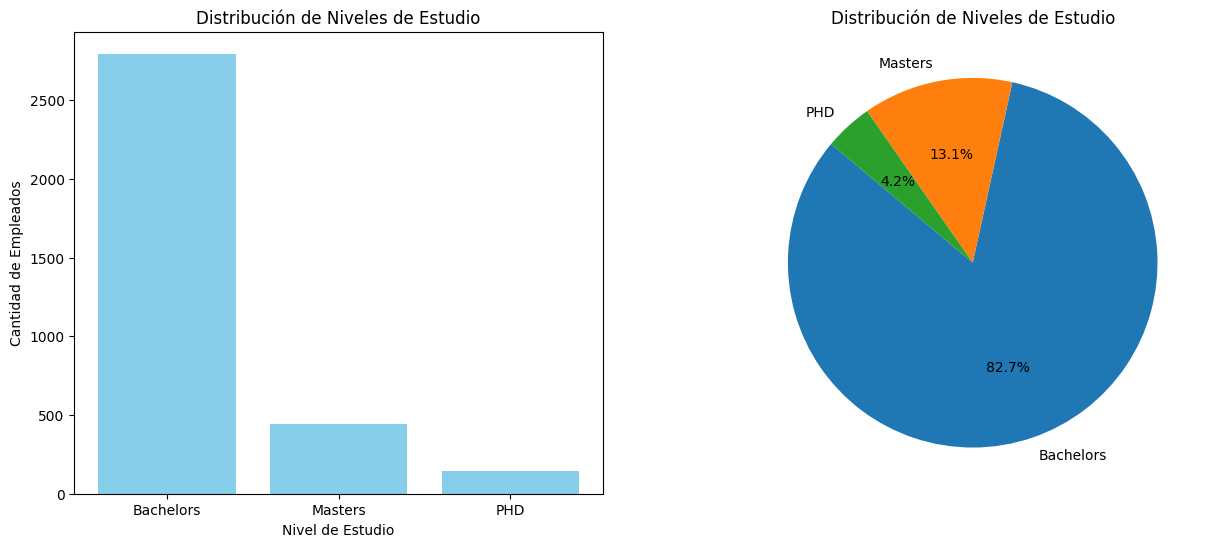

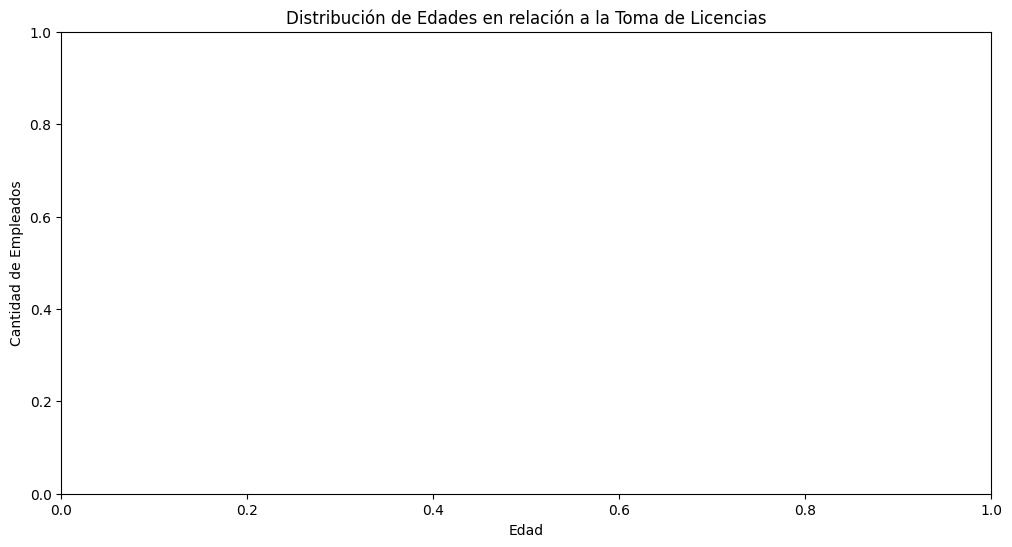

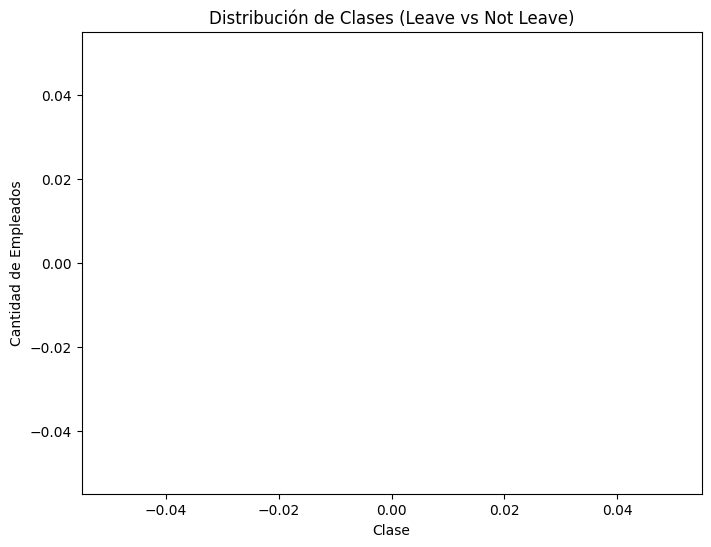

Proporción de clases:
Series([], Name: count, dtype: float64)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Modelo sin cambios:
Accuracy en entrenamiento: 1.00
Accuracy en test: 1.00
F1 Score en entrenamiento: 0.00
F1 Score en test: 0.00


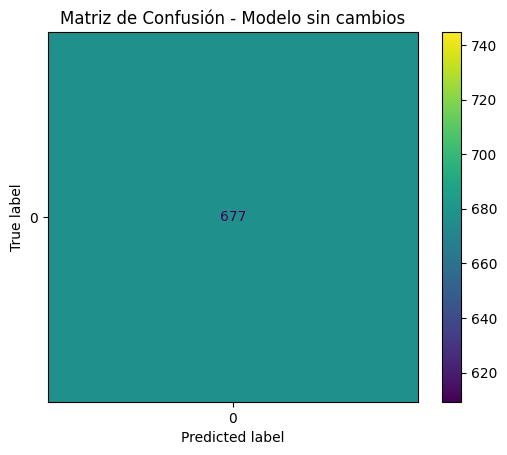

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Modelo con class_weight='balanced':
Accuracy en entrenamiento: 1.00
Accuracy en test: 1.00
F1 Score en entrenamiento: 0.00
F1 Score en test: 0.00


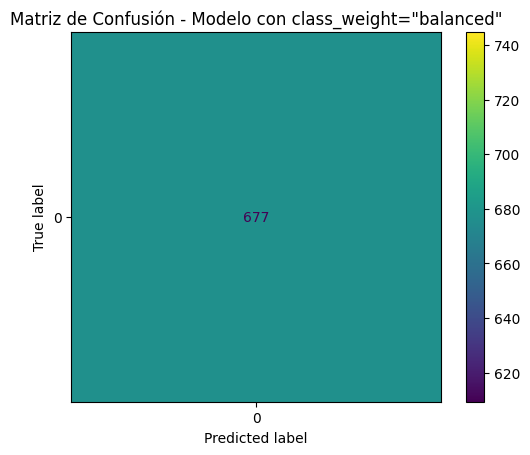

In [29]:
!pip install gdown
import pandas as pd
import gdown



# URL de descarga directa del archivo CSV en Google Drive
url = 'https://drive.google.com/uc?export=download&id=1sLvCEUOmbL341MApio5RC05nHpgGrq06'

# Intenta cargar el dataset desde la URL de descarga directa
try:
    df = pd.read_csv(url)

    # Convertir la columna 'LeaveOrNot' de valores binarios a etiquetas categóricas
    df['LeaveOrNot'] = df['LeaveOrNot'].map({0: 'Not Leave', 1: 'Leave'})

    # Mostrar las primeras filas del dataset para verificar
    display(df.head())

except Exception as e:
    print(f"Error al cargar el archivo CSV: {str(e)}")


# Verificar si existen valores faltantes
missing_values = df.isnull().sum()
print(missing_values)

# Convertir la columna 'LeaveOrNot'
df['LeaveOrNot'] = df['LeaveOrNot'].map({0: 'Not Leave', 1: 'Leave'})

# Verificar la conversión
df['LeaveOrNot'].value_counts()

# Eliminar filas con valores faltantes en 'ExperienceInCurrentDomain' y 'JoiningYear'
df = df.dropna(subset=['ExperienceInCurrentDomain', 'JoiningYear'])

# Imputar valores faltantes en 'Age' con la media
df['Age'].fillna(df['Age'].mean(), inplace=True)

import numpy as np

# Función para detectar y eliminar outliers usando IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Columnas numéricas a revisar para outliers (excluyendo la columna objetivo)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()


# Eliminar outliers para cada columna numérica
for column in numeric_columns:
    df = remove_outliers(df, column)

# Verificar el dataset después de la eliminación de outliers
df.describe()

import matplotlib.pyplot as plt

# Graficar la distribución de los sexos con un gráfico de torta
sex_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Géneros')
plt.show()
# Graficar la distribución de niveles de estudio de los empleados
education_counts = df['Education'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histograma
ax[0].bar(education_counts.index, education_counts.values, color='skyblue')
ax[0].set_title('Distribución de Niveles de Estudio')
ax[0].set_xlabel('Nivel de Estudio')
ax[0].set_ylabel('Cantidad de Empleados')

# Gráfico de torta
ax[1].pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Distribución de Niveles de Estudio')

plt.show()

import seaborn as sns

# Crear un histograma para comparar las edades de empleados que tomaron licencias y los que no
plt.figure(figsize=(12, 6))
plt.title('Distribución de Edades en relación a la Toma de Licencias')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Empleados')
plt.show()

# Graficar la distribución de clases
class_counts = df['LeaveOrNot'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color='lightcoral')
plt.title('Distribución de Clases (Leave vs Not Leave)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Empleados')
plt.show()

# Verificar si el dataset está balanceado
print("Proporción de clases:")
print(class_counts / len(df))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separar la columna objetivo
X = df.drop(columns=['LeaveOrNot'])
y = df['LeaveOrNot']

# Convertir variables categóricas a variables dummies
X = pd.get_dummies(X)

# Codificar la variable objetivo
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Realizar una partición estratificada del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Entrenar el primer RandomForest sin cambios
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Entrenar el segundo RandomForest con class_weight="balanced"
rf_model_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model_balanced.fit(X_train, y_train)

# Predicciones y métricas para el primer modelo
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Modelo sin cambios:")
print(f"Accuracy en entrenamiento: {train_accuracy:.2f}")
print(f"Accuracy en test: {test_accuracy:.2f}")
print(f"F1 Score en entrenamiento: {train_f1:.2f}")
print(f"F1 Score en test: {test_f1:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Matriz de Confusión - Modelo sin cambios')
plt.show()

# Predicciones y métricas para el segundo modelo
y_train_pred_balanced = rf_model_balanced.predict(X_train)
y_test_pred_balanced = rf_model_balanced.predict(X_test)

train_accuracy_balanced = accuracy_score(y_train, y_train_pred_balanced)
test_accuracy_balanced = accuracy_score(y_test, y_test_pred_balanced)
train_f1_balanced = f1_score(y_train, y_train_pred_balanced)
test_f1_balanced = f1_score(y_test, y_test_pred_balanced)

print("Modelo con class_weight='balanced':")
print(f"Accuracy en entrenamiento: {train_accuracy_balanced:.2f}")
print(f"Accuracy en test: {test_accuracy_balanced:.2f}")
print(f"F1 Score en entrenamiento: {train_f1_balanced:.2f}")
print(f"F1 Score en test: {test_f1_balanced:.2f}")

# Matriz de confusión
cm_balanced = confusion_matrix(y_test, y_test_pred_balanced)
ConfusionMatrixDisplay(cm_balanced).plot()
plt.title('Matriz de Confusión - Modelo con class_weight="balanced"')
plt.show()








In [28]:
df['LeaveOrNot'] = df['LeaveOrNot'].map({0: 'Not Leave', 1: 'Leave'})

In [26]:
# Verifica si la columna 'LeaveOrNot' existe
if 'LeaveOrNot' in df.columns:
    # Convierte la columna 'LeaveOrNot' de valores binarios a etiquetas categóricas
    df['LeaveOrNot'] = df['LeaveOrNot'].map({0: 'Not Leave', 1: 'Leave'})
    print("Conversión exitosa!")
else:
    print("La columna 'LeaveOrNot' no fue encontrada en el DataFrame.")

Conversión exitosa!
